# Exercise 2 - Image Classification

In this exercise you and your team have to finish the implementation of the following machine learning code.  

This exercise consists of the following steps which have to work in conjunction:  
* Data visualization - Visualize the data to become familiar with it and identify possible patterns and problems
* Data preparation - Prepare the data for it to be usable later in the machine learning model
* Model creation - Chose/build a machine learning model suitable for the given task
* Model training - Train your model with the data you prepared
* Model evaluation - Evaluate the performance of your model. For this choose appropriate measurement metrics and visualize it with the help of graphs and figures

## Part 1 - Classical Machine Learning Algorithms

### Important imports

In [1]:
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import os

----------------

In [ ]:
!wget 'https://github.com/YoongiKim/CIFAR-10-images/archive/refs/heads/master.zip'

In [ ]:
!unzip master.zip

In [ ]:
if not os.path.exists('data'):
    !mkdir data
!mv 'CIFAR-10-images-master' 'data'

In [ ]:
!rm master.zip

---

### Inspect the data 

The first step of every machine learning project is to make oneself familiar with the data.  

* In what form is the data accessible?
* How many samples are there?
* Are they already sorted by class?
* etc.

It is important to look through them programmatically and manually to see if maybe some prior preparation is needed before even loading the data.

In [2]:
!ls 'data/CIFAR-10-images/'

test  train


In [3]:
!ls 'data/CIFAR-10-images/train/'

airplane  automobile  bird  cat  deer  dog  frog  horse  ship  truck


In [4]:
!ls 'data/CIFAR-10-images/train/airplane/'

0000.jpg  0625.jpg  1250.jpg  1875.jpg	2500.jpg  3125.jpg  3750.jpg  4375.jpg
0001.jpg  0626.jpg  1251.jpg  1876.jpg	2501.jpg  3126.jpg  3751.jpg  4376.jpg
0002.jpg  0627.jpg  1252.jpg  1877.jpg	2502.jpg  3127.jpg  3752.jpg  4377.jpg
0003.jpg  0628.jpg  1253.jpg  1878.jpg	2503.jpg  3128.jpg  3753.jpg  4378.jpg
0004.jpg  0629.jpg  1254.jpg  1879.jpg	2504.jpg  3129.jpg  3754.jpg  4379.jpg
0005.jpg  0630.jpg  1255.jpg  1880.jpg	2505.jpg  3130.jpg  3755.jpg  4380.jpg
0006.jpg  0631.jpg  1256.jpg  1881.jpg	2506.jpg  3131.jpg  3756.jpg  4381.jpg
0007.jpg  0632.jpg  1257.jpg  1882.jpg	2507.jpg  3132.jpg  3757.jpg  4382.jpg
0008.jpg  0633.jpg  1258.jpg  1883.jpg	2508.jpg  3133.jpg  3758.jpg  4383.jpg
0009.jpg  0634.jpg  1259.jpg  1884.jpg	2509.jpg  3134.jpg  3759.jpg  4384.jpg
0010.jpg  0635.jpg  1260.jpg  1885.jpg	2510.jpg  3135.jpg  3760.jpg  4385.jpg
0011.jpg  0636.jpg  1261.jpg  1886.jpg	2511.jpg  3136.jpg  3761.jpg  4386.jpg
0012.jpg  0637.jpg  1262.jpg  1887.jpg	2512.jpg  3137.jpg  3762.

In [5]:
# Get information about the folder contents
import os

for dirpath, dirnames, filenames in os.walk("data/CIFAR-10-images/"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'data/CIFAR-10-images/'.
There are 10 directories and 0 images in 'data/CIFAR-10-images/test'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test/horse'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test/bird'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test/deer'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test/ship'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test/frog'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test/cat'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test/truck'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test/dog'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test/automobile'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test/airplane'.
There are 10 directories and 0 images in 'data/CIFAR-10-images/train'.
There are 0 di

**Since each sample is already sorted into its own dictionary we don't have to do it ourselfs and can take the folder names as names for our classes we want our model to be able to classify**

In [6]:
# get class names from folders
import pathlib
import numpy as np

data_dir = pathlib.Path("data/CIFAR-10-images/train/")  # turn our training path into a Python path
class_names = np.array(
    sorted([item.name for item in data_dir.glob('*')]))  # created a list of class_names from the subdirectories
print(class_names, len(class_names))

['airplane' 'automobile' 'bird' 'cat' 'deer' 'dog' 'frog' 'horse' 'ship'
 'truck'] 10


In [7]:
# associate class names with numbers, machinelaerning and deeplearning works with numbers!
class_names_dict = dict(zip(class_names, range(0, 11)))
len(class_names_dict), class_names_dict

(10,
 {'airplane': 0,
  'automobile': 1,
  'bird': 2,
  'cat': 3,
  'deer': 4,
  'dog': 5,
  'frog': 6,
  'horse': 7,
  'ship': 8,
  'truck': 9})

### Visualizing

After getting a feeling about the size and structure of our data on our hard drive, the next step is to visualize the data.  
In the case of image data this can be done by loading random images and ploting them. Also just looking through them in their folders is a good idea.

In [8]:
import random
import matplotlib.image as mpimg


def display_random_img(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)

    img = mpimg.imread(target_folder + "/" + random_image[0])

    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    print(f"Image shape: {img.shape}")

    return img

**By running the code cell below we can look through random images and might be able to see out-liners or maybe even wrongly labeled images**

Image shape: (32, 32, 3)


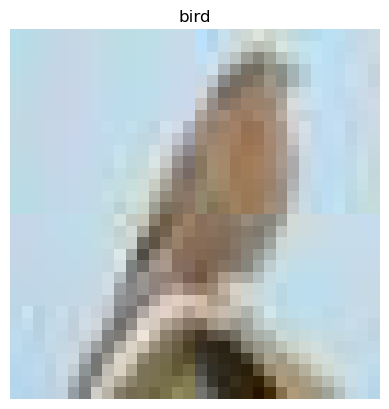

In [9]:
# Display a random image
img = display_random_img(target_dir="data/CIFAR-10-images/train/",
                         target_class=class_names[2])

Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)


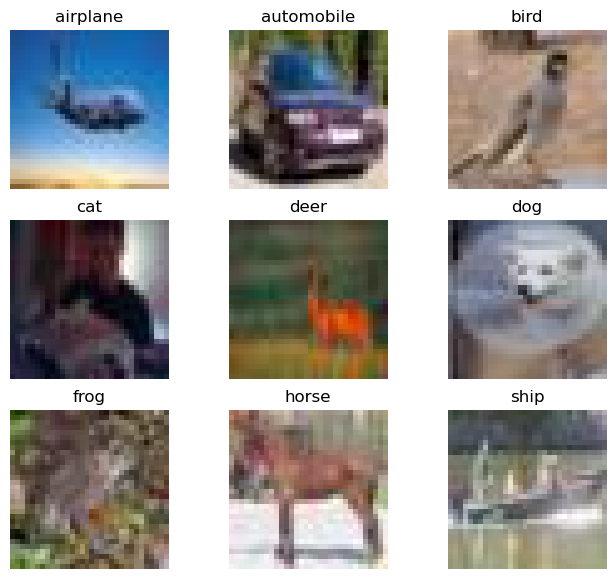

In [10]:
# Display multiple images from the data set
plt.figure(figsize=(8,7))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = display_random_img(target_dir="data/CIFAR-10-images/train/", target_class=class_names[i])
    plt.imshow(img)
    plt.axis(False)

**An images representation is nothing else than a array of the pixel values. These values are usually between 0 and 255 and depending on the value the pixel is brighter or darker. By overlaying the 3 color channels red, green, blue (RGB) the colored images we know are created**

In [11]:
# Display image as array
img

array([[[ 69,  81,  67],
        [ 52,  64,  50],
        [ 59,  69,  58],
        ...,
        [161, 156, 163],
        [155, 147, 158],
        [177, 169, 180]],

       [[ 71,  83,  73],
        [ 61,  73,  63],
        [ 70,  80,  72],
        ...,
        [128, 125, 136],
        [130, 124, 136],
        [154, 146, 159]],

       [[ 81,  92,  86],
        [ 77,  88,  84],
        [ 81,  92,  88],
        ...,
        [114, 110, 125],
        [132, 125, 141],
        [158, 151, 167]],

       ...,

       [[156, 153, 120],
        [163, 160, 129],
        [151, 150, 119],
        ...,
        [164, 169, 137],
        [160, 166, 132],
        [155, 161, 127]],

       [[149, 150, 118],
        [157, 158, 126],
        [149, 152, 121],
        ...,
        [164, 170, 136],
        [162, 168, 132],
        [160, 166, 130]],

       [[148, 151, 120],
        [155, 158, 127],
        [150, 155, 125],
        ...,
        [161, 167, 131],
        [160, 166, 130],
        [160, 166, 128]]

**The image shape is (32, 32, 3) this means the width and the height of the image consists of 32 pixels and 3 color channels**

In [12]:
# Displays image shape
img.shape

(32, 32, 3)

### Generate dataset out of CIFAR-10 images

Now that we got familiar with our data it is time to create a data set with which we can train our machine learning algorithm.
Since the folder structure is split into train and test we will also only generate a training and test set.

#### Loading data from the file system and generating training and test sets

To load the images from the file system we need to walk through the folders and add the images (normalized) to an array as well as the corresponding labels. Also, for the machine learning algorithms to work with these arrays we need to convert them to numpy arrays

In [13]:
def load_images_as_features_and_labels(target_dir, class_name_dictionary):
    images = []
    labels = []
    for dirpath, dirnames, filenames in os.walk(target_dir):
        for file in filenames:
            filepath = os.path.join(dirpath, file)
            img = mpimg.imread(filepath)
            images.append(img/255.)
            class_name = os.path.basename(os.path.normpath(dirpath))
            encoded_class_name = class_name_dictionary[class_name]
            labels.append(encoded_class_name)
    X = np.array(images)
    y = np.array(labels)
    return X, y

With help of the function above we can now load the images and there labels as a training and test set

In [14]:
X_train, y_train = load_images_as_features_and_labels('data/CIFAR-10-images/train/', class_names_dict)
X_test, y_test = load_images_as_features_and_labels('data/CIFAR-10-images/test/', class_names_dict)

### Visualizing once again

After loading our data as training and test set it is once again important to visualize the loaded data. This way our understanding of our data grows, and we might notice errors we would not otherwise

First investigate the shape of our training and test set. One of the most common errors in ML is that the input shape for the algorithm is not compatible with the shape of our data

In [15]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000,), (10000, 32, 32, 3), (10000,))

These shapes tell us the following:
* X_train is a four dimensional array
    - The first dimension tells us how many samples are in the array - 50000
    - The second dimension tells us how many pixle values the image has to represent its height - 32
    - The third dimension tells us how many pixle values the image has to represent its width - 32
    - The fourth dimension tells us how many color channels the image has (red ,green blue - RGB) - 3
* y_train is a one dimensional array containing the corresponding lables to X_train

Next we will visualize the actual images contained in our loaded data

In [16]:
def print_multiple_figures(images_array):
    plt.figure(figsize=(9, 9))
    for idx, img in enumerate(images_array[:100]):
        plt.subplot(10, 10, idx + 1)
        plt.imshow(img, cmap="binary")
        plt.axis("off")
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

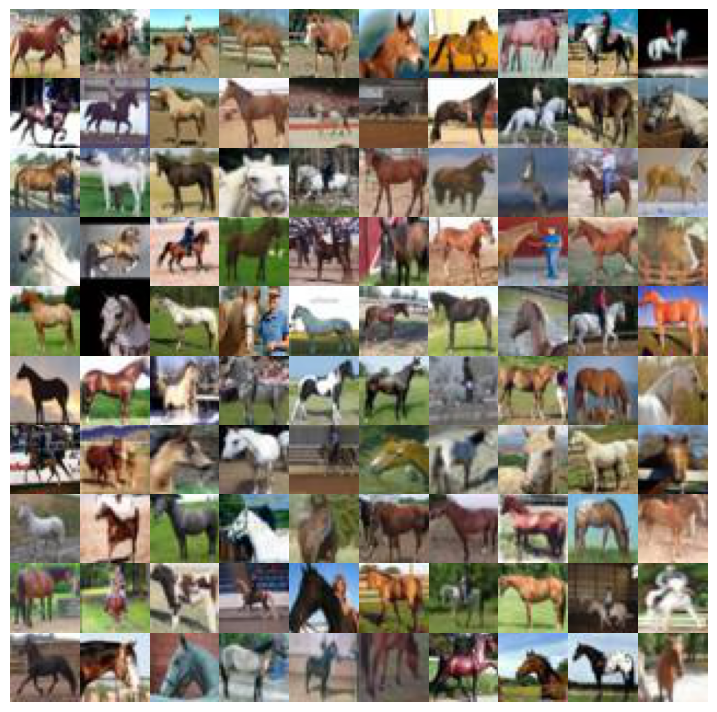

In [17]:
print_multiple_figures(X_train)

**By visualizing the train data we can see that the training set contains the images as we have loaded it. Meaning the data is sorted in order of the walked through folders**

## Training of our machine learning algorithm

We will use the random forest classifier algorithm to try and classify our test images.
For this we first need to once again prepapre our data for the algorithm and then fit (train) it on our training data.

**Random forest classifier needs input in shape of (batch, flattended image) i.e (50000, 3072) -> 32*32*3  = 3072. This means we have to reshape or data**

In [18]:
# Random forest classifier needs input in shape of (batch, flattended image) i.e (50000, 3072) -> 32*32*3  = 3072
nsamples, nx, ny, nz = X_train.shape
X_train_flattened = X_train.reshape((nsamples, nx * ny * nz))
nsamples, nx, ny, nz = X_test.shape
X_test_flattened = X_test.reshape((nsamples, nx * ny * nz))

X_train_flattened.shape, X_test_flattened.shape

((50000, 3072), (10000, 3072))

After our data has the right shape we can fit/train a RandomForest Classifier on it

In [19]:
%%time
from sklearn.ensemble import RandomForestClassifier

rnf_clf = RandomForestClassifier(random_state=42)
rnf_clf.fit(X_train_flattened, y_train)

CPU times: user 2min 59s, sys: 146 ms, total: 2min 59s
Wall time: 2min 59s


RandomForestClassifier(random_state=42)

With the classifier now trained on the training data we can make predictions with it

In [21]:
y_pred_clf = rnf_clf.predict(X_test_flattened)

### Evaluation of the classifier

It is always important test our classifier. After all how should we know how well it performs?
To measure its performance multiple metrics can be used. The most important being:
* accuracy
* precision
* recall
* f1  

We can callculate it ourselfs or import a function from scikit-learn to do it for us.  
Now with our predictions and the test data we can evaluate the classifier

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_clf = accuracy_score(y_test, y_pred_clf)
precision_clf = precision_score(y_test, y_pred_clf, average='weighted')
recall_clf = recall_score(y_test, y_pred_clf, average='weighted')
f1_clf = f1_score(y_test, y_pred_clf, average='weighted')

accuracy_clf, precision_clf, recall_clf, f1_clf

(0.4639, 0.4592676278895342, 0.4639, 0.4601852442279655)

### Viszalization of the evaluation

Another way to evaluate our classifier is by visualizing its performance.  
One way to do that is to use a confusion matrix.  
This matrix tells us how many samples were classified correctly and how many were falsly classified as a different class.  
https://en.wikipedia.org/wiki/Confusion_matrix  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

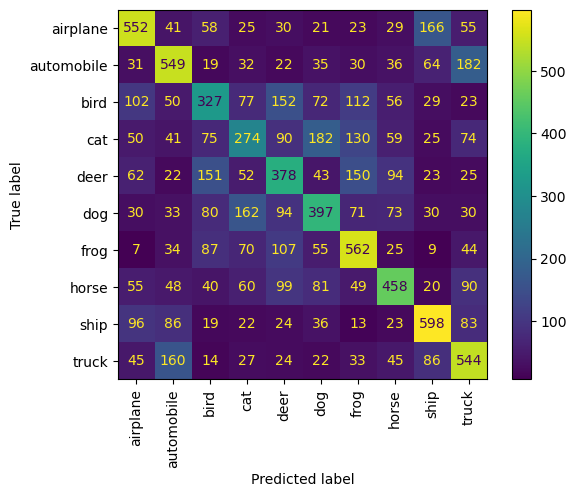

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_clf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names_dict.keys())
disp.plot(xticks_rotation='vertical')
plt.show()

--------------------------------------------------------------

## Part 2 - Convolutional Neural Networks

In [24]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


tf.__version__

'2.8.0'

If you have installed tensorflow with gpu support you should first of all be able to output your GPU.  
To install tensorflow with GPU support please follow the steps described here:  
https://www.tensorflow.org/install/pip

In [25]:
# Check if we're using a GPU
!nvidia-smi

Thu Dec 15 16:08:03 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 520.61.05    Driver Version: 520.61.05    CUDA Version: 11.8     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:01:00.0  On |                  N/A |
|  0%   59C    P0    54W / 240W |   2957MiB /  8192MiB |     13%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Next to make sure tensorflow is able to detect your GPU get the device with `tf.config.list_physical_devices('GPU')`.  
And enable mixed precission if your GPU is good enough.  
For more information about mixed precission look here:  
https://www.tensorflow.org/guide/mixed_precision

In [26]:
from tensorflow.keras import mixed_precision

gpu_devices = tf.config.list_physical_devices('GPU')
if gpu_devices:
    details = tf.config.experimental.get_device_details(gpu_devices[0])
    print(f"Your GPUs compute capability is {details['compute_capability'][:]}")
    if details['compute_capability'][0] >= 7.0:
        mixed_precision.set_global_policy('mixed_float16')
        print(f"Your global policy has been set to: {mixed_precision.global_policy()}")
    else:
        print(f"Your GPU does not support mixed precision, the global policy is left at: {mixed_precision.global_policy()}")
else: 
    print("No GPU device could be found on your machine")

Your GPUs compute capability is (6, 1)
Your GPU does not support mixed precision, the global policy is left at: <Policy "float32">


2022-12-15 16:08:04.056337: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-15 16:08:04.323611: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-15 16:08:04.323794: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-15 16:08:04.324534: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


### Generate dataset out of CIFAR-10 images Load images from directory with image data generator and flow from diretrory & Augment it with ImageDataGenerator

The next step after getting to know our data is to load it as a training and test set.  
For this purpose the `ImageDataGenerator`, which applies image augmentation, and `flow_from_directory` which loads the images from the folders can be used.  
For more information and how to use them in detail look here:  
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator  
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory  

**!!WARNING: `ImageDataGenerator` AND `flow_from_directory` ARE DEPRECATED AND SHOULD NO LONGER BE USED, INSTEAD USE `dataset_from_directory` https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory!!**

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_augmented_0 = ImageDataGenerator(rescale=1 / 255.,
                                               width_shift_range=0.1,  # shift the image width ways
                                               height_shift_range=0.1,  # shift the image height ways
                                               horizontal_flip=True)  # flip the image on the horizontal axis

train_datagen_0 = ImageDataGenerator(rescale=1 / 255.)

test_datagen_0 = ImageDataGenerator(rescale=1 / 255.)

In [28]:
BATCH_SIZE=64

In [29]:
train_dir = "data/CIFAR-10-images/train/"
test_dir = "data/CIFAR-10-images/test"

train_data_augmented_0 = train_datagen_augmented_0.flow_from_directory(train_dir,
                                                                       target_size=(32, 32),
                                                                       batch_size=BATCH_SIZE,
                                                                       class_mode='categorical',
                                                                       shuffle=False)  # Don't shuffle for demonstration purposes, usually a good thing to shuffle

train_data_0 = train_datagen_0.flow_from_directory(train_dir,
                                                   target_size=(32, 32),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='categorical',
                                                   shuffle=False)  # Don't shuffle for demonstration purposes

test_data_0 = test_datagen_0.flow_from_directory(test_dir,
                                                 target_size=(32, 32),
                                                 batch_size=BATCH_SIZE,
                                                 class_mode='categorical',
                                                shuffle=False)

Found 50000 images belonging to 10 classes.
Found 50000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [30]:
train_data_0.image_shape

(32, 32, 3)

## Image augmentation visualization

Once again it is important to visualize our data. In this case how data augmentation looks on our images and maybe see mistakes in loading our data (e.g. not shuffling it).

In [31]:
images_0, labels_0 = train_data_0.next()
augmented_images_0, augmented_labels_0 = train_data_augmented_0.next()

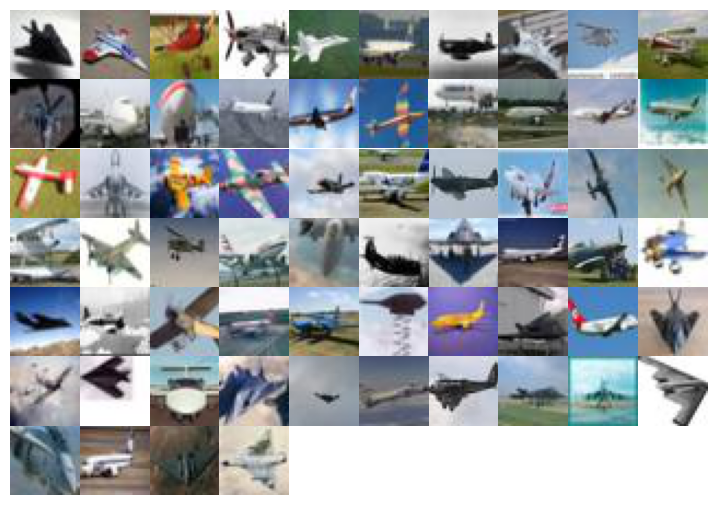

In [32]:
print_multiple_figures(images_0)

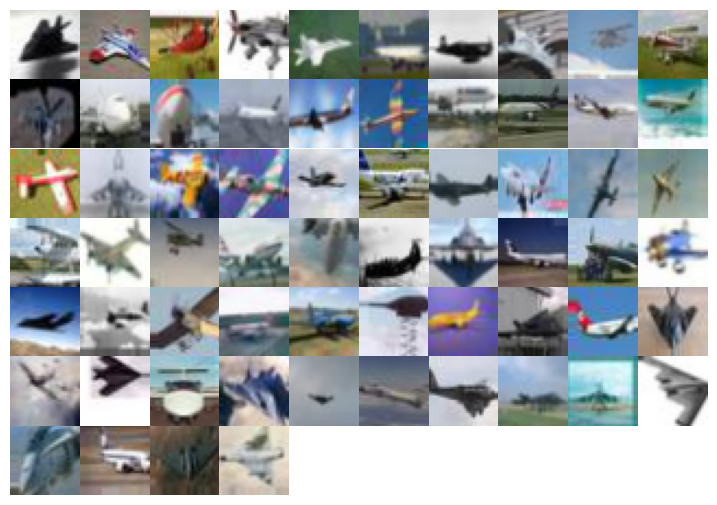

In [33]:
print_multiple_figures(augmented_images_0)

Load the training data again but this time shuffled.
More information on why you should shuffle your data can be found here:  
https://datascience.stackexchange.com/questions/24511/why-should-the-data-be-shuffled-for-machine-learning-tasks/24524#24524

In [34]:
# Load train data again but this time shuffle it
tf.random.set_seed(42)

train_dir = "data/CIFAR-10-images/train/"

train_data_augmented_0 = train_datagen_augmented_0.flow_from_directory(train_dir,
                                                                       target_size=(32, 32),
                                                                       batch_size=BATCH_SIZE,
                                                                       class_mode='categorical',
                                                                       shuffle=True)

Found 50000 images belonging to 10 classes.


### CNN Architecture

Finally we can start to build our CNN model. There are three possilbe ways in tensorflow to build one:  
* Sequential API - https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
* Functional API - https://www.tensorflow.org/guide/keras/functional
* Subclassing - https://www.tensorflow.org/guide/keras/custom_layers_and_models

In this case we will use the Sequential API.  

In [35]:
input_shape = (32, 32, 3)
num_classes_0 = train_data_0.num_classes

In [36]:
model_0 = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=input_shape),        
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes_0, activation='softmax')
    ]
)

2022-12-15 16:08:12.398520: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-15 16:08:12.399748: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-15 16:08:12.400062: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-15 16:08:12.400250: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

To train our model we first need to compile it. In this step the most important arguments are the: 
* loss function - https://www.tensorflow.org/api_docs/python/tf/keras/losses
* optimizer - https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

In [37]:
model_0.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy', 'Recall', 'Precision'])

In [38]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

Callbacks can help you execute certain tasks during the training phase.  
For example to reduce overfitting by training to long you can define a early stopping callback to stop training after the models metric did not increase for some time

In [39]:
# define early_stopping call back and monitor the accuracy
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", 
                                                  patience=10)

In [40]:
history_0 = model_0.fit(train_data_augmented_0,
                        validation_data=test_data_0,
                        epochs=100,
                       callbacks=[early_stopping])

Epoch 1/100


2022-12-15 16:08:16.521819: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8600


782/782 [==============================] - 33s 36ms/step - loss: 1.7805 - accuracy: 0.3908 - recall: 0.2178 - precision: 0.5229 - val_loss: 1.5143 - val_accuracy: 0.4698 - val_recall: 0.3538 - val_precision: 0.5528
Epoch 2/100
782/782 [==============================] - 27s 35ms/step - loss: 1.2889 - accuracy: 0.5384 - recall: 0.3581 - precision: 0.6978 - val_loss: 1.1025 - val_accuracy: 0.6092 - val_recall: 0.4923 - val_precision: 0.7192
Epoch 3/100
782/782 [==============================] - 28s 35ms/step - loss: 1.0963 - accuracy: 0.6123 - recall: 0.4695 - precision: 0.7479 - val_loss: 1.0498 - val_accuracy: 0.6248 - val_recall: 0.5383 - val_precision: 0.7068
Epoch 4/100
782/782 [==============================] - 27s 35ms/step - loss: 0.9976 - accuracy: 0.6506 - recall: 0.5282 - precision: 0.7720 - val_loss: 0.9802 - val_accuracy: 0.6715 - val_recall: 0.6013 - val_precision: 0.7515
Epoch 5/100
782/782 [==============================] - 28s 35ms/step - loss: 0.9247 - accuracy: 0.6794 -

### Evaluate the model

After training we can evaluate our models performance on the test data.  
for this we can use the `evaluate` method.  
This will evaluate the model on the metrics we decided to track during training (loss is always tracked).

In [41]:
loss, accuracy, recall, precision = model_0.evaluate(test_data_0)
print("Loss:", loss)
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)

157/157 [==============================] - 3s 18ms/step - loss: 0.5095 - accuracy: 0.8298 - recall: 0.7997 - precision: 0.8656
Loss: 0.509524941444397
Accuracy: 0.829800009727478
Recall: 0.7997000217437744
Precision: 0.8655698895454407


Another important step in evaluating our model is to visualize how the various metrics  behaved during training.  
This way unusual patterns like overfitting and underfitting can be discovered.  
To plot these curves the history object which is created during training can be used.  
To see how look into the coresponding helper function.

In [42]:
# Plot the validation and training data separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    recall = history.history['recall']
    val_recall = history.history['val_recall']
    
    precision = history.history['precision']
    val_precision = history.history['val_precision']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();
    
    # Plot recall
    plt.figure()
    plt.plot(epochs, recall, label='training_recall')
    plt.plot(epochs, val_recall, label='val_recall')
    plt.title('Recall')
    plt.xlabel('Epochs')
    plt.legend();
    
    # Plot precision
    plt.figure()
    plt.plot(epochs, precision, label='training_precision')
    plt.plot(epochs, val_precision, label='val_precision')
    plt.title('Precision')
    plt.xlabel('Epochs')
    plt.legend();

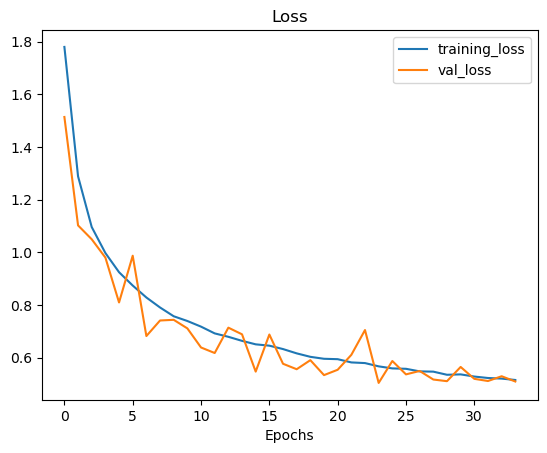

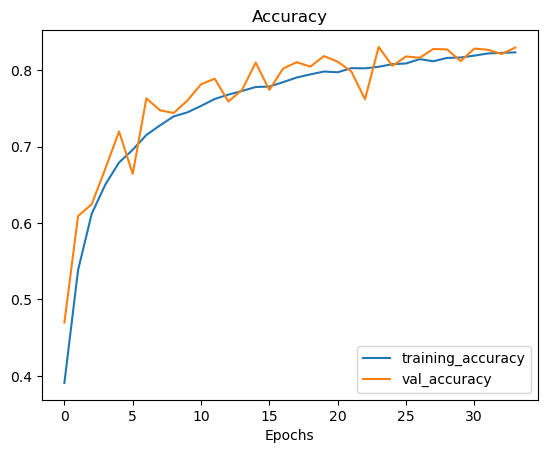

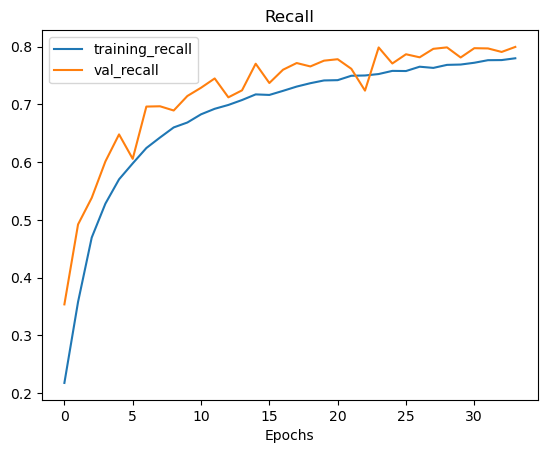

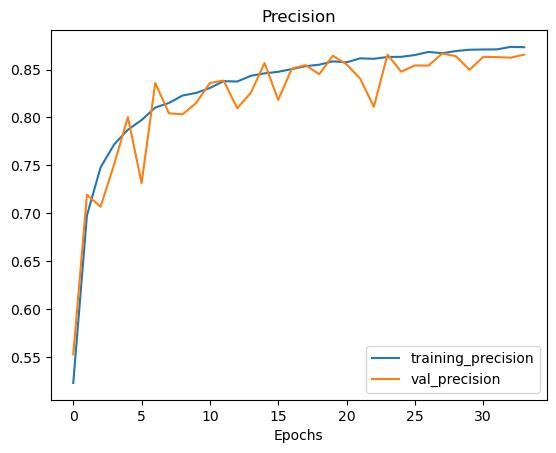

In [43]:
# Check out the loss curves
plot_loss_curves(history_0)

In [44]:
y_pred_0 = model_0.predict(test_data_0)

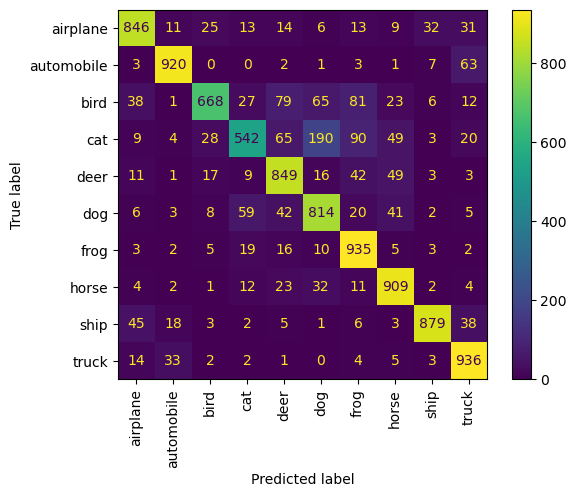

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(test_data_0.labels, y_pred_0.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names_dict.keys())
disp.plot(xticks_rotation='vertical')
plt.show()

### Load images from directory with image_dataset_from_directory & create augmentation layer

This step once again describes how data can be loaded and how a CNN model can be trained.  
But in this case we use the now recomended way of loading data with `image_dataset_from_directory` and applying augmentation inside the model during training.  
The advantage of this is that augmentation can than also benefit from the acceleration of an GPU.  
For more information and examples look here:  
https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory  
https://www.tensorflow.org/api_docs/python/tf/data/Dataset  
https://www.tensorflow.org/tutorials/load_data/images  
https://www.tensorflow.org/tutorials/images/data_augmentation  
https://www.tensorflow.org/guide/keras/preprocessing_layers  

In [46]:
train_dir = "data/CIFAR-10-images/train/"
test_dir = "data/CIFAR-10-images/test/"

train_data_1 = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                   label_mode="categorical",
                                                                   batch_size=BATCH_SIZE,
                                                                   shuffle=True,
                                                                   image_size=(32, 32))

test_data_1 = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                  label_mode="categorical",
                                                                  batch_size=BATCH_SIZE,
                                                                  image_size=(32, 32),
                                                                 shuffle=False)

Found 50000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


In [47]:
num_classes = len(train_data_1.class_names)

To use data augmentation inside our CNN model we first need to create a data augmentation "layer".  
For this we use the Sequential API and stack different preprocessing layers.  
The different layers and their options can be found in the documentation:  
https://www.tensorflow.org/guide/keras/preprocessing_layers

In [48]:
# create a sequential model which will be added as a layer in the model
from tensorflow.keras.layers.experimental import preprocessing

data_augmentation = tf.keras.Sequential([
    preprocessing.RandomFlip("horizontal"),  # randomly flip images on horizontal edge
    preprocessing.RandomContrast(0.2),
    preprocessing.Rescaling(1/255.0)  # rescale image
], name="data_augmentation")

Next we build our CNN model, this time with help of the functional API.  
It is the same model as before, but with addition of our `data_augmentation` layer

In [49]:
# build model with functional api

inputs = tf.keras.layers.Input(shape=(32, 32, 3), name='input_layer')
x = data_augmentation(inputs)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model_1 = tf.keras.Model(inputs, outputs)

In [50]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 data_augmentation (Sequenti  (None, 32, 32, 3)        0         
 al)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 32)       128   

The next steps of compiling, training and evaluating the model are the same as before.  

In [51]:
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy', 'Recall', 'Precision'])

In [52]:
history_1 = model_1.fit(train_data_1,
                        validation_data=test_data_1,
                        epochs=100,
                       callbacks=[early_stopping])

Epoch 1/100
782/782 [==============================] - 17s 20ms/step - loss: 1.6536 - accuracy: 0.4329 - recall: 0.2714 - precision: 0.5700 - val_loss: 1.1707 - val_accuracy: 0.5834 - val_recall: 0.4379 - val_precision: 0.7144
Epoch 2/100
782/782 [==============================] - 12s 15ms/step - loss: 1.1588 - accuracy: 0.5869 - recall: 0.4360 - precision: 0.7361 - val_loss: 0.9840 - val_accuracy: 0.6525 - val_recall: 0.5448 - val_precision: 0.7598
Epoch 3/100
782/782 [==============================] - 10s 13ms/step - loss: 0.9995 - accuracy: 0.6490 - recall: 0.5213 - precision: 0.7724 - val_loss: 0.8312 - val_accuracy: 0.7073 - val_recall: 0.6167 - val_precision: 0.8018
Epoch 4/100
782/782 [==============================] - 19s 25ms/step - loss: 0.9008 - accuracy: 0.6866 - recall: 0.5812 - precision: 0.7909 - val_loss: 0.7752 - val_accuracy: 0.7302 - val_recall: 0.6539 - val_precision: 0.8105
Epoch 5/100
782/782 [==============================] - 13s 16ms/step - loss: 0.8321 - accura

### Evaluate model

In [53]:
loss_1, accuracy_1, recall_1, precision_1 = model_1.evaluate(test_data_1)
print("Loss:", loss_1)
print("Accuracy:", accuracy_1)
print("Recall:", recall_1)
print("Precision:", precision_1)

157/157 [==============================] - 1s 8ms/step - loss: 0.4710 - accuracy: 0.8500 - recall: 0.8344 - precision: 0.8746
Loss: 0.47103238105773926
Accuracy: 0.8500000238418579
Recall: 0.8343999981880188
Precision: 0.8746331334114075


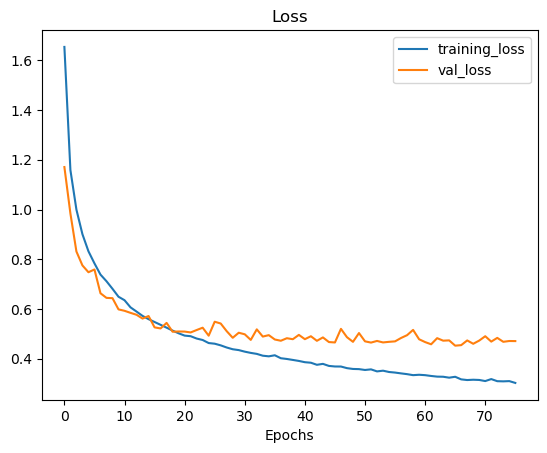

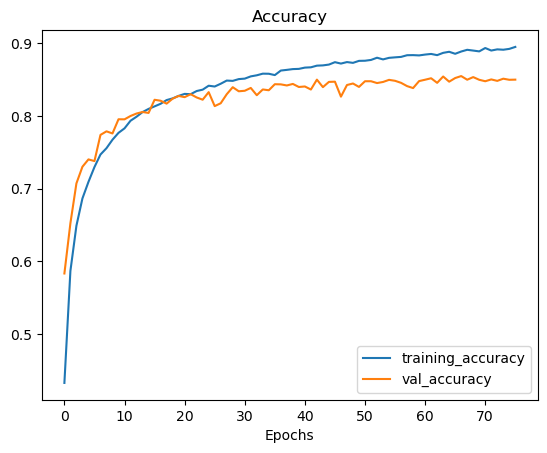

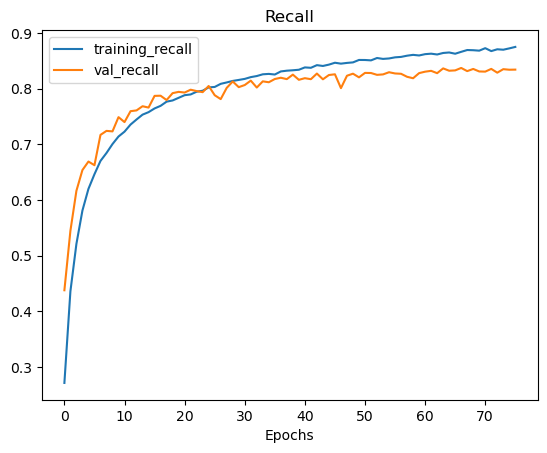

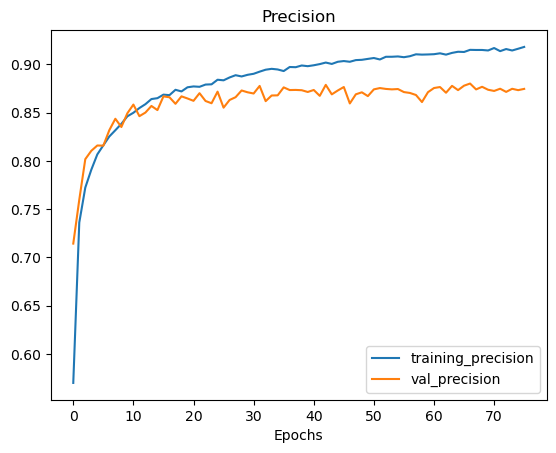

In [54]:
# Check out the loss curves
plot_loss_curves(history_1)

In [55]:
y_pred_1 = model_1.predict(test_data_1)

In [56]:
y_test_1 = np.concatenate([y for x, y in test_data_1], axis=0)
y_test_1.argmax(axis=1)


array([0, 0, 0, ..., 9, 9, 9])

In [57]:
y_pred_1.argmax(axis=1).shape

(10000,)

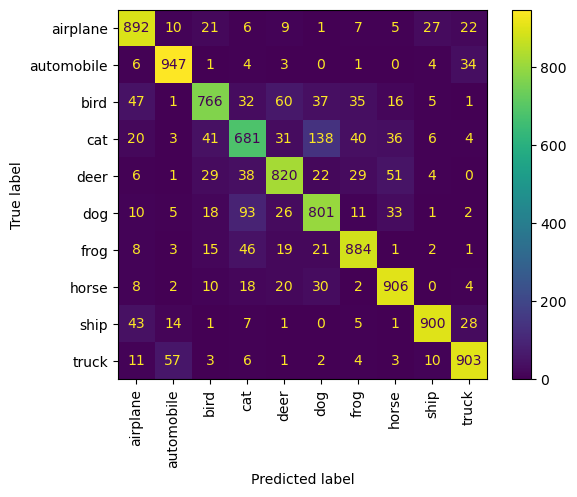

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_1.argmax(axis=1), y_pred_1.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names_dict.keys())
disp.plot(xticks_rotation='vertical')
plt.show()

## Use transfer learning

Training a Neural Network often takes a lot of time and data. But often you don't have either.  
Especially if you have to create your own data you often do not have the resources to collect lots of it.  
What you can do then is to use a already trainend model and depending on your task modify it.  

https://www.tensorflow.org/tutorials/images/transfer_learning

Analysing, visualizing and loading our data is the same as before.

In [59]:
BATCH_SIZE = 128
image_size  =(32, 32)

In [60]:
train_dir = "data/CIFAR-10-images/train/"
test_dir = "data/CIFAR-10-images/test/"

train_data_tf = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                   label_mode="categorical",
                                                                   batch_size=BATCH_SIZE,
                                                                   shuffle=True,
                                                                   image_size=image_size)

test_data_tf = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                  label_mode="categorical",
                                                                  batch_size=BATCH_SIZE,
                                                                  image_size=image_size,
                                                                 shuffle=False)

Found 50000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


In [61]:
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),  # randomly flip images on horizontal edge
    layers.RandomContrast(0.2),
    layers.Rescaling(1/255.0)  
], name="data_augmentation")

In [62]:
input_shape = (32,32,3)

Next we load a CNN archtecture with the help of tensorflow.  
Over the years some architectures displayed great results at diverse challanges (e.g. Imagenet competition).  
These architectures can be found on tensorflow and can be loaded into our programm.  
Furthermore these models are available with their trained weights. These weights were trained on the ImageNet data set, a large image data set https://www.image-net.org/download.php.  
We can use the model as is but then we have to use it for the same task and classes it was trainend for. But often we need for example a different output layer.  
For this purpose we can define with the `include_top = False` argument that we want to load the model with out its classifier layers (the top layers).  
This way we can later define them ourserlf and put them on top.  
For a list of available networks and their options visit:  
https://www.tensorflow.org/api_docs/python/tf/keras/applications

In [63]:
# build the base model out of a pretrained architecture from tensorflow
base_model = tf.keras.applications.vgg16.VGG16(include_top=False, weights='imagenet', input_shape=input_shape)

In [64]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

Depening of how our task differes from the task the original model was trained for, we can use the trained weights as they are or retrain all or some of them.  
This is called fine tuning.  
To use the pretrained layers without retraining them set their `trainable` property to `False` or use a loop to loop through the layers and set the desired layers to `False`

In [65]:
base_model.trainable = False

Then we use the functional API to build our model wich uses the pretrained model as a base and puts a, for our task necessary, classifier on top.

In [66]:
# build whole model
model_inputs = tf.keras.layers.Input(shape=input_shape)
x = data_augmentation(model_inputs)
x = base_model(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(units=128, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.4)(x)
model_output = tf.keras.layers.Dense(units=10, activation='softmax')(x)

model_tf = tf.keras.Model(inputs=model_inputs, outputs=model_output)

In [67]:
model_tf.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 data_augmentation (Sequenti  (None, 32, 32, 3)        0         
 al)                                                             
                                                                 
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               65664     
                                                                 
 batch_normalization_14 (Bat  (None, 128)              512       
 chNormalization)                                          

The next steps are then the same as before. -> compile, train and evaluate the model.
One difference could be if you want to do some fine tuning to train the model for a few eopchs to train the custom classificator on top.  
And then set the layers of the base model to `trainable=True` and then train the whole model.  
This depends on your task and needs experimentation.  

In [68]:
model_tf.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy', 'Recall', 'Precision'])

In [69]:
history_tf = model_tf.fit(train_data_tf,
                        validation_data=test_data_tf,
                        epochs=5)

Epoch 1/5
391/391 [==============================] - 16s 36ms/step - loss: 1.6049 - accuracy: 0.4475 - recall: 0.2657 - precision: 0.6120 - val_loss: 1.3573 - val_accuracy: 0.5291 - val_recall: 0.2758 - val_precision: 0.7424
Epoch 2/5
391/391 [==============================] - 13s 34ms/step - loss: 1.3412 - accuracy: 0.5337 - recall: 0.3466 - precision: 0.6925 - val_loss: 1.2925 - val_accuracy: 0.5490 - val_recall: 0.3579 - val_precision: 0.7213
Epoch 3/5
391/391 [==============================] - 14s 35ms/step - loss: 1.2826 - accuracy: 0.5563 - recall: 0.3773 - precision: 0.7090 - val_loss: 1.2596 - val_accuracy: 0.5574 - val_recall: 0.3628 - val_precision: 0.7341
Epoch 4/5
391/391 [==============================] - 14s 35ms/step - loss: 1.2557 - accuracy: 0.5619 - recall: 0.3879 - precision: 0.7152 - val_loss: 1.2352 - val_accuracy: 0.5682 - val_recall: 0.3852 - val_precision: 0.7354
Epoch 5/5
391/391 [==============================] - 14s 35ms/step - loss: 1.2434 - accuracy: 0.5675

In [70]:
base_model.trainable = True

In [71]:
history_tf = model_tf.fit(train_data_tf,
                        validation_data=test_data_tf,
                        initial_epoch=history_tf.epoch[-1],
                        epochs=100,
                       callbacks=[early_stopping])

Epoch 5/100
391/391 [==============================] - 14s 35ms/step - loss: 1.2302 - accuracy: 0.5743 - recall: 0.4048 - precision: 0.7233 - val_loss: 1.2124 - val_accuracy: 0.5735 - val_recall: 0.4033 - val_precision: 0.7388
Epoch 6/100
391/391 [==============================] - 14s 35ms/step - loss: 1.2192 - accuracy: 0.5768 - recall: 0.4124 - precision: 0.7262 - val_loss: 1.2071 - val_accuracy: 0.5793 - val_recall: 0.4001 - val_precision: 0.7360
Epoch 7/100
391/391 [==============================] - 14s 35ms/step - loss: 1.2065 - accuracy: 0.5819 - recall: 0.4197 - precision: 0.7278 - val_loss: 1.2002 - val_accuracy: 0.5770 - val_recall: 0.4154 - val_precision: 0.7278
Epoch 8/100
391/391 [==============================] - 14s 35ms/step - loss: 1.2016 - accuracy: 0.5830 - recall: 0.4220 - precision: 0.7292 - val_loss: 1.1917 - val_accuracy: 0.5866 - val_recall: 0.4119 - val_precision: 0.7423
Epoch 9/100
391/391 [==============================] - 14s 36ms/step - loss: 1.1967 - accura

### Evaluate model

Surprisingly the pretrained model does not perform as well as our models trained from scratch. This can be because of a number of reasons. i.e.:
* The model is "to big" for our data set and overfitting ocurrs.  
* Fine Tuning was not done with enough care or was not even neccessary.
* The task for which the base model was trained is too difierent and not well applicable on our task.
* etc. 

Another important part is that the pretrained VGG16 model was trained on the 224x224x3 imagenet data set, but the images of the cifar-10 data set are only 32x32x3. 

In [72]:
loss_tf, accuracy_tf, recall_tf, precision_tf = model_tf.evaluate(test_data_tf)
print("Loss:", loss_tf)
print("Accuracy:", accuracy_tf)
print("Recall:", recall_tf)
print("Precision:", precision_tf)

79/79 [==============================] - 2s 26ms/step - loss: 1.1550 - accuracy: 0.5899 - recall: 0.4395 - precision: 0.7421
Loss: 1.1549993753433228
Accuracy: 0.589900016784668
Recall: 0.43950000405311584
Precision: 0.7421479225158691


array([0, 0, 0, ..., 9, 9, 9])

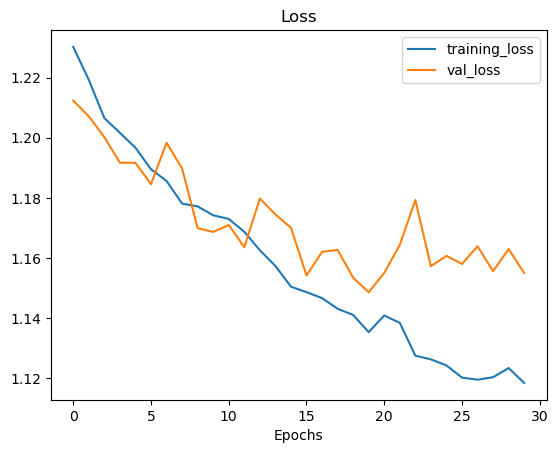

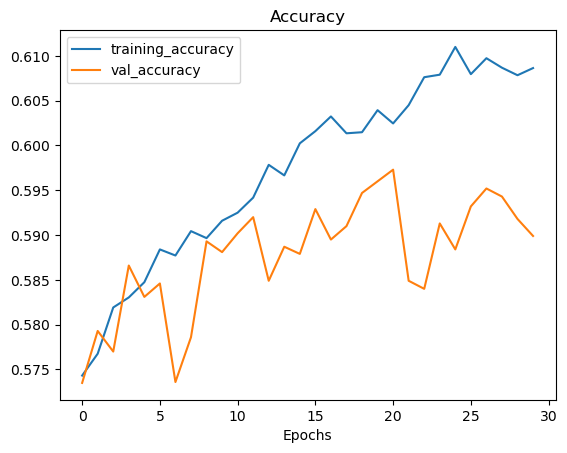

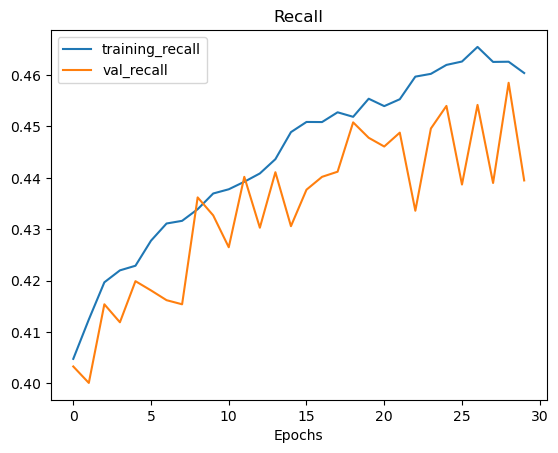

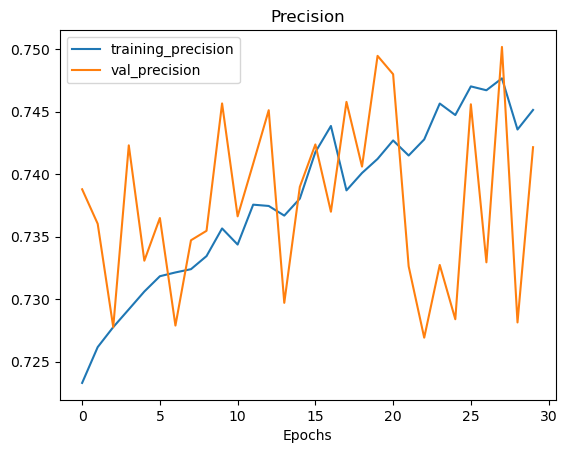

In [73]:
# Check out the loss curves
plot_loss_curves(history_tf)
y_pred_tf = model_tf.predict(test_data_tf)
y_test_tf = np.concatenate([y for x, y in test_data_tf], axis=0)
y_test_tf.argmax(axis=1)

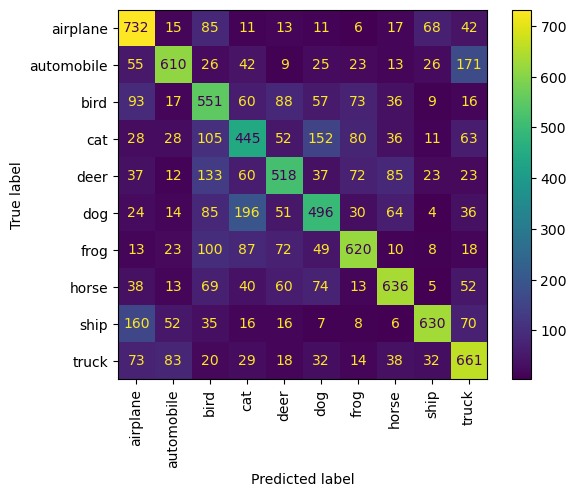

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_tf.argmax(axis=1), y_pred_tf.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation='vertical')
plt.show()

## Save the model for later use (i.e. deploying it to production, making predictions, grad-cam, etc)

After we have trained a model we can easily save it with `model.save()`

In [75]:
model_1.save('saved_models/model_with_data_augmentation_layer')

2022-12-15 16:55:20.001457: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: saved_models/model_with_data_augmentation_layer/assets


## GRAD-CAM - Making CNNs explainable

Next we will load our saved model and use it to gain more insight into what areas of the image lead to the classification result.  
To make this possible we will use Grad-CAM: Gradient-weighted Class Activation Mapping.
Grad-CAM mapps uses the gradients of the last convolutional layer to generate a heatmap, which visualizes the area of the image which lead to the classification. 
For more information about GRAD-CAM refer to the paper: https://arxiv.org/abs/1610.02391  
and for a possible implementaion you can look at the tutorial on keras https://keras.io/examples/vision/grad_cam/ (which was also used in this code)

In [76]:
# load a saved tensorflow model with load_model()
model_gradcam = tf.keras.models.load_model('saved_models/model_with_data_augmentation_layer/')

While it is always good to look at the summary of our model to know how many layers and parameters it contains. In this case it is also important to find out the name of the last convolutional layer.  
We will later use the output of this layer for the GRAD-CAM algorithm.

In [77]:
model_gradcam.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 data_augmentation (Sequenti  (None, 32, 32, 3)        0         
 al)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 32)       128   

In [78]:
last_conv_layer_name = "conv2d_11"

In [79]:
class_names

array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
       'horse', 'ship', 'truck'], dtype='<U10')

Then we need images on which we want to apply GRAD-CAM. This can be a single image (as in this case). Or multiple images

Image shape: (32, 32, 3)


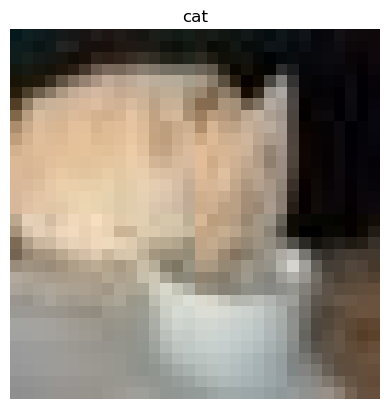

In [80]:
# Display a random image
img = display_random_img(target_dir="data/CIFAR-10-images/train/",
                         target_class=class_names[3])

The next code cell contains the function which applies the algorithm and returns a resulting heatmap as an numpy array. For deeper insights refer to the paper and the tutorial on keras.  
> https://arxiv.org/abs/1610.02391  
> https://keras.io/examples/vision/grad_cam/

In [81]:
# taken from https://keras.io/examples/vision/grad_cam/

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model_gradcam.inputs], [model_gradcam.get_layer(last_conv_layer_name).output, model_gradcam.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [82]:
def image_to_array(img):
    return tf.expand_dims(img, axis=0)

Predicted: cat
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 2.1838471e-01
  5.8548331e-01 1.6702172e-01 0.0000000e+00]
 [0.0000000e+00 2.9691885e-04 1.0425263e-01 2.1742164e-01 4.6726200e-01
  3.7783960e-01 3.2752544e-01 0.0000000e+00]
 [9.4136139e-03 4.0897392e-02 5.3362411e-02 1.6695374e-01 1.8642882e-01
  1.4608572e-01 1.0654156e-01 1.1880835e-01]
 [6.2544525e-02 1.3235895e-01 6.0293999e-02 4.9549493e-01 7.8790110e-01
  4.6232465e-01 1.2619771e-01 1.4032258e-01]
 [3.3903450e-02 8.8930264e-02 0.0000000e+00 6.9600895e-02 1.0000000e+00
  2.5563294e-01 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.5439175e-01 2.5969693e-01 2.1235536e-01
  1.3944922e-01 1.8332501e-01 4.4811908e-02]
 [0.0000000e+00 0.0000000e+00 2.2470458e-01 2.1347556e-01 4.9818784e-02
  1.8526776e-01 1.7596838e-01 1.8777958e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.9283257e-01 1.1744181e-02 2.8541235e-03]] (8, 8)


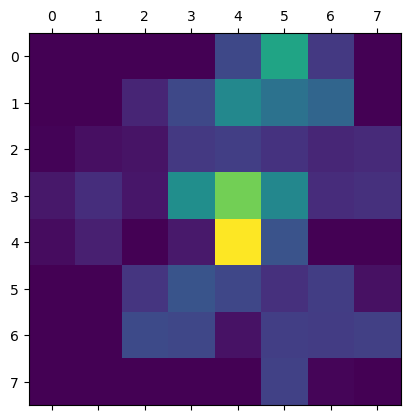

In [83]:
# Prepare image
img_array = image_to_array(img) # add a batch dimension to the image


# Remove last layer's softmax
model_gradcam.layers[-1].activation = None

# Print what the top predicted class is
preds = model_gradcam.predict(img_array)
predicted_class = class_names[np.argmax(preds)]
print(f"Predicted: {predicted_class}")

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model_gradcam, last_conv_layer_name)
print(heatmap, heatmap.shape)

# Display heatmap
plt.matshow(heatmap)
plt.show()

Next we overlap the produced heatmap with the original image

In [84]:
import matplotlib.cm as cm
from IPython.display import Image, display

def display_gradcam(img, heatmap, alpha=0.4):

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

    plt.imshow(superimposed_img)
    plt.title(predicted_class)
    plt.axis("off");

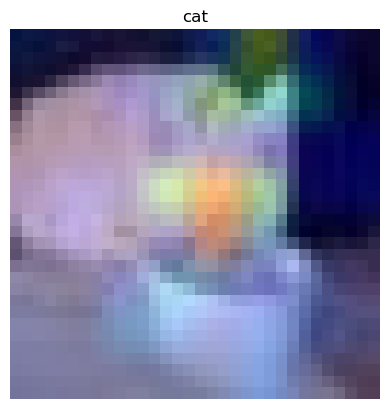

In [85]:
display_gradcam(img, heatmap)